# **Gaussian Naive Bayes**

Import Libraries
- scikit-learn(사이킷런) 머신러닝 라이브러리 dataset을 전체 불러오기 (랜덤하게 데이터 만들기)
- matplot 라이브러리에서 pyplot을 plt라는 이름으로 import

In [97]:
from sklearn import datasets
import matplotlib.pyplot as plt

Generate some (random) data

make_blobs 함수
- 100 : data 수
- 2 : feature 수
- center : class 수
- random_state : 난수 발생 시드 (data 퍼짐 정도)
- cluster_std : 클러스터의 표준 편차

plt.scatter 함수
- X는 값, Y는 class
- c : dot 컬러
- s : 마커 사이즈
- cmap : 컬러맵 (도트 컬러 자동변경)
- scatter는 공간상에 데이터 분포가 어떻게 되어있는지 보여주기 용이함

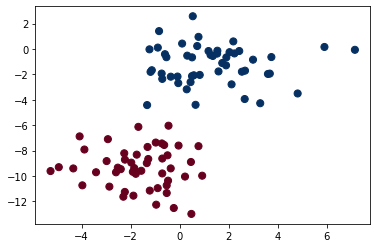

In [98]:
X, Y = datasets.make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='RdBu')
plt.show()

**Train a Naive Bayes Model**
- 사이킷런에 있는 서브라이브러리인 naive_bayes 중에 GaussianNB 만 불러오기.

In [99]:
from sklearn.naive_bayes import GaussianNB

- 데이터 넣어서 만들 수 있는 model 생성
- .000 : 라이브러리 안에 있는 함수 사용하기
   ex) .fit : 학습시키기 / X : data, Y : class

In [100]:
model = GaussianNB()
model.fit(X, Y)

GaussianNB()

Let's check out the distribution of the classes
- theta : 각 분포의 평균 
- sigma : 각 분포의 분산
=> feature2, class2 여서 아래 결과와 같이 2*2.
=> 가로축 class, 세로축 feature

In [101]:
model.theta_    # mean of each feature per class (n_classes, n_features)

array([[-1.64939095, -9.36891451],
       [ 1.29327924, -1.24101221]])

In [102]:
model.sigma_    # variance of each feature per class (n_classes, n_features)

array([[2.06097005, 2.47716872],
       [3.33164807, 2.22401384]])

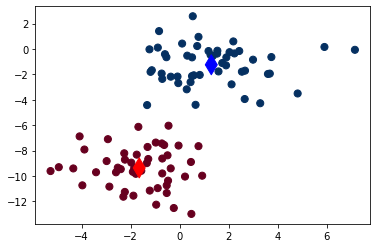

In [103]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='RdBu')
# 평균지점 표시
plt.scatter(model.theta_[:,0], model.theta_[:,1], marker='d', c=['r', 'b'], s=200)
plt.show()

**Performance Evaluation**
- 성능평가 metrics 라이브러리로 해보자.
- .predict 함수로 예측 가능.

In [104]:
from sklearn import metrics

In [105]:
# 예측
pred = model.predict(X)
# 예측 결과 (처음부터 10번째까지)
print(pred[:10])
# 실제 정답
print(Y[:10])

# probability 값 확인
score = model.predict_proba(X)
print(score[:10,:])

[0 0 0 1 1 0 0 1 0 0]
[0 0 0 1 1 0 0 1 0 0]
[[9.99999851e-01 1.49493829e-07]
 [9.99999996e-01 4.42104442e-09]
 [9.62619703e-01 3.73802974e-02]
 [3.06624237e-05 9.99969338e-01]
 [9.54657907e-09 9.99999990e-01]
 [9.99793520e-01 2.06480117e-04]
 [1.00000000e+00 1.59854976e-10]
 [9.27204427e-08 9.99999907e-01]
 [9.99996844e-01 3.15571604e-06]
 [9.99425227e-01 5.74773311e-04]]


Accuracy
- 예측이 끝났으면, 실제로 얼마나 정확한지 계산 해봐야 함

In [106]:
#(정답,예측)
acc = metrics.accuracy_score(Y, pred)
print('Accuracy : ', acc)

Accuracy :  1.0


In [107]:
X2, Y2 = datasets.make_blobs(100, 2, centers=2, random_state=2, cluster_std=2.5)

pred2 = model.predict(X2)
print(pred2[:10])
print(Y2[:10])

score2 = model.predict_proba(X2)
print(score2[:10,:])

[0 0 1 1 1 0 0 1 0 0]
[0 0 0 1 1 0 0 1 0 0]
[[9.99999612e-01 3.88491068e-07]
 [9.99999997e-01 3.44837480e-09]
 [4.99205050e-03 9.95007950e-01]
 [4.75844547e-04 9.99524155e-01]
 [7.46849254e-10 9.99999999e-01]
 [9.63586610e-01 3.64133901e-02]
 [1.00000000e+00 2.57642243e-12]
 [2.08526468e-08 9.99999979e-01]
 [9.99959412e-01 4.05880951e-05]
 [7.58993344e-01 2.41006656e-01]]


Accuracy

In [108]:
acc2 = metrics.accuracy_score(Y2, pred2)
print('Accuracy : ', acc2)

Accuracy :  0.96


# **Breast Cancer Wisconsin (Diagnostic) Dataset**
*   569 instances (212 Malignant(악성종양), 357 Benign(양성종양))
*   30 numerical features (computed from a digitized image of a breast mass)
*   2 classes (Malignant, Benign)


Import Libraries
- 넘파이(Numpy)는 Python에서 벡터, 행렬 등 수치 연산을 수행하는 선형대수(Linear algebra) 라이브러리

In [109]:
import numpy as np
from sklearn import datasets

Load dataset

In [110]:
wisconsin = datasets.load_breast_cancer()

In [111]:
# 어떤 것들이 들어있는지.
wisconsin.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [112]:
wisconsin.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [113]:
# dimension이 어떻게 되는지 (569명에 대한 30개의 x값을 갖고 있다)
wisconsin.data.shape

(569, 30)

In [114]:
wisconsin.target_names

array(['malignant', 'benign'], dtype='<U9')

**Prepare Data**
학습용, 검증용 dataset 나누기

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
# 30%는 test set으로 사용하겠다.
TrainX, TestX, TrainY, TestY = train_test_split(wisconsin.data, wisconsin.target, test_size=0.3, random_state=0)

In [117]:
print(TrainX.shape)
print(TrainY.shape)
print(TestX.shape)
print(TestY.shape)

(398, 30)
(398,)
(171, 30)
(171,)


**Train a Naive Bayes Model**

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
model = GaussianNB()
model.fit(TrainX, TrainY)

GaussianNB()

In [120]:
model.theta_

array([[1.75263087e+01, 2.12936242e+01, 1.15739530e+02, 9.89914765e+02,
        1.03175839e-01, 1.44903154e-01, 1.60549128e-01, 8.89431544e-02,
        1.92871812e-01, 6.24804698e-02, 6.20642282e-01, 1.17787047e+00,
        4.35542282e+00, 7.52542282e+01, 6.69622819e-03, 3.12345168e-02,
        3.97942282e-02, 1.46321745e-02, 2.02401275e-02, 3.94693289e-03,
        2.12708054e+01, 2.89844295e+01, 1.42098054e+02, 1.44953624e+03,
        1.45362349e-01, 3.73629195e-01, 4.41866309e-01, 1.83275570e-01,
        3.24036913e-01, 9.13052349e-02],
       [1.21863815e+01, 1.79357430e+01, 7.83306827e+01, 4.65552610e+02,
        9.24651807e-02, 7.96516867e-02, 4.58566815e-02, 2.58631888e-02,
        1.73413655e-01, 6.27457831e-02, 2.82508434e-01, 1.22036827e+00,
        1.97572771e+00, 2.11168554e+01, 7.15546586e-03, 2.14281406e-02,
        2.60984562e-02, 9.91100000e-03, 2.04994739e-02, 3.60831044e-03,
        1.34207992e+01, 2.34701205e+01, 8.71740161e+01, 5.61965462e+02,
        1.24849679e-01,

In [121]:
pred_train = model.predict(TrainX)
print(pred_train[:20])
print(TrainY[:20])

score_train = model.predict_proba(TrainX)
score_train[:10,:]

[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1]


array([[3.01258495e-14, 1.00000000e+00],
       [3.08800401e-15, 1.00000000e+00],
       [8.01924517e-14, 1.00000000e+00],
       [1.00000000e+00, 1.55557236e-17],
       [1.76929961e-13, 1.00000000e+00],
       [8.19450787e-17, 1.00000000e+00],
       [1.31537275e-11, 1.00000000e+00],
       [1.71165140e-17, 1.00000000e+00],
       [6.92921401e-02, 9.30707860e-01],
       [1.00000000e+00, 5.35089823e-76]])

In [122]:
pred_test = model.predict(TestX)
print(pred_test[:20])
print(TestY[:20])

score_test = model.predict_proba(TestX)
score_test[:10,:]

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0]


array([[9.99999623e-01, 3.77053186e-07],
       [4.48249009e-13, 1.00000000e+00],
       [3.80802767e-14, 1.00000000e+00],
       [1.92053261e-11, 1.00000000e+00],
       [2.78578114e-16, 1.00000000e+00],
       [4.21504591e-14, 1.00000000e+00],
       [9.54831838e-11, 1.00000000e+00],
       [8.42593606e-15, 1.00000000e+00],
       [1.80520999e-13, 1.00000000e+00],
       [5.70735050e-17, 1.00000000e+00]])

**Performance Evaluation**

In [123]:
from sklearn import metrics

Accuracy

In [124]:
tr_acc = metrics.accuracy_score(TrainY, pred_train)
print('Training Accuracy : ', tr_acc)

ts_acc = metrics.accuracy_score(TestY, pred_test)
print('Test Accuracy : ', ts_acc)

Training Accuracy :  0.9422110552763819
Test Accuracy :  0.9239766081871345


ROC curve & AUC
- curve 아래 영역이 얼마나 되는지로 어떤 model이 더 나은지 판단해보자.

In [125]:
# 예측된 label이 아니라 계산된 값을 줘야함. posterior probability값, _proba로 계산된 값.
tr_fpr, tr_tpr, tr_th = metrics.roc_curve(TrainY, score_train[:,1], pos_label=1)
ts_fpr, ts_tpr, ts_th = metrics.roc_curve(TestY, score_test[:,1], pos_label=1)

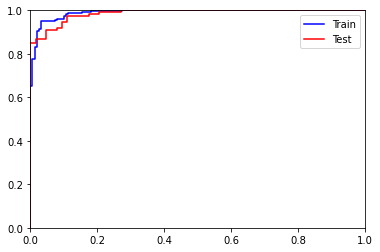

In [126]:
import matplotlib.pyplot as plt

plt.plot(tr_fpr, tr_tpr, color='b', label='Train')
plt.plot(ts_fpr, ts_tpr, color='r', label='Test')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='best')
plt.show()

In [127]:
# 계산되는 방법이 달라서 Accuracy와 equal은 아니다.
tr_auc = metrics.roc_auc_score(TrainY, score_train[:,1])
print('Training AUC : ', tr_auc)

ts_auc = metrics.roc_auc_score(TestY, score_test[:,1])
print('Test AUC : ', ts_auc)

Training AUC :  0.9893803401525566
Test AUC :  0.9854497354497355


# **Iris Plants Dataset**
*   150 instances (50 per each class)
*   4 numerical features (sepal length, sepal width, petal length, petal width)
*   3 class (setosa, versicolor, virginica)



In [128]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [129]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [130]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Prepare Data**

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
TrainX, TestX, TrainY, TestY = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

In [133]:
print(TrainX.shape)
print(TrainY.shape)
print(TestX.shape)
print(TestY.shape)

(105, 4)
(105,)
(45, 4)
(45,)


**Train a Naive Bayes Model**

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
model = GaussianNB()
model.fit(TrainX, TrainY)

GaussianNB()

In [136]:
model.theta_

array([[4.99411765, 3.38235294, 1.45294118, 0.23235294],
       [5.921875  , 2.75625   , 4.196875  , 1.30625   ],
       [6.65384615, 2.98717949, 5.5974359 , 2.03076923]])

In [137]:
pred_train = model.predict(TrainX)
print(pred_train)
print(TrainY)

[1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 2 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0]
[1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


In [138]:
pred_test = model.predict(TestX)
print(pred_test)
print(TestY)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


**Performance Evaluation**

In [139]:
from sklearn import metrics

Accuracy

In [140]:
tr_acc = metrics.accuracy_score(TrainY, pred_train)
print('Training Accuracy : ', tr_acc)

ts_acc = metrics.accuracy_score(TestY, pred_test)
print('Test Accuracy : ', ts_acc)

Training Accuracy :  0.9428571428571428
Test Accuracy :  1.0


Confusion Matrix

In [141]:
tr_cmat = metrics.confusion_matrix(TrainY, pred_train)
print(tr_cmat)

tr_cmat = metrics.confusion_matrix(TestY, pred_test)
print(tr_cmat)

[[34  0  0]
 [ 0 29  3]
 [ 0  3 36]]
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
